## Gradient Descent - Boston Dataset
Boston dataset is one of the datasets available in sklearn.
You are given a Training dataset csv file with X train and Y train data. As studied in lecture, your task is to come up with Gradient Descent algorithm and thus predictions for the test dataset given.
Your task is to:
    1. Code Gradient Descent for N features and come with predictions.
    2. Try and test with various combinations of learning rates and number of iterations.
    3. Try using Feature Scaling, and see if it helps you in getting better results. 
Read Instructions carefully -
    1. Use Gradient Descent as a training algorithm and submit results predicted.
    2. Files are in csv format, you can use genfromtxt function in numpy to load data from csv file. Similarly you can use savetxt function to save data into a file.
    3. Submit a csv file with only predictions for X test data. File name should not have spaces. File should not have any headers and should only have one column i.e. predictions. Also predictions shouldn't be in exponential form. 
    4. Your score is based on coefficient of determination.


In [2]:
import numpy as np
import pandas as pd

In [3]:
# Loading Datasets

train_dataset = np.genfromtxt("data.csv", names = None, delimiter = ",")
train_df = pd.DataFrame(train_dataset)
print(train_df.describe())
num_cols = len(train_df.columns)
X_train = train_df.values[:, 0: num_cols -1 ]
Y_train = train_df.values[:, num_cols - 1]
print(X_train.shape)
print(Y_train.shape)

# print(X_train)
# print(Y_train)
"""
test_dataset = np.genfromtxt("test_boston_x_test.csv", names = None, delimiter = ",")
test_df = pd.DataFrame(test_dataset)
print(test_df.describe())
num_cols = len(test_df.columns)
X_test = test_df.values

print(X_test.shape)

# print(X_train) 
"""

                0           1
count  100.000000  100.000000
mean    48.958341   72.735051
std      9.746379   16.658187
min     25.128485   31.707006
25%     41.526164   60.788586
50%     49.634970   72.179542
75%     56.762631   83.215080
max     70.346076  118.591217
(100, 1)
(100,)


'\ntest_dataset = np.genfromtxt("test_boston_x_test.csv", names = None, delimiter = ",")\ntest_df = pd.DataFrame(test_dataset)\nprint(test_df.describe())\nnum_cols = len(test_df.columns)\nX_test = test_df.values\n\nprint(X_test.shape)\n\n# print(X_train) \n'

In [4]:
def single_step(X, Y, m, alpha):
    n_1 = len(m)
    num_eg = len(X)
    slope_m = np.zeros(n_1) 
    
    for j in range(n_1):
        for i in range(num_eg) :
            slope_m[j] += (-2/num_eg)* ((Y[i] - (m *(X[i])).sum() ) * X[i][j] )    
    #for j in range(n_1):
            m[j] -= alpha*slope_m[j]
    return m

def cost(X, Y, m):
    cost = 0
    num_eg = len(X)
    for i in range(num_eg) :
        cost += ((Y[i] - (m * X[i]).sum())**2 )/num_eg
    return cost

def gd(X, Y, alpha, num_iters):
    num_eg = len(X)
    X = np.c_[X, np.ones(X.shape[0])]
    m = np.zeros(len(X[0]))
    costs = {}
    print(len(m))
    for i in range(num_iters):
        m = single_step(X, Y, m, alpha)
        if i % 100 == 0 :
            costs[i] = cost(X, Y, m)
            print(i, " ", costs[i])
    import matplotlib.pyplot as plt
    keys = [key for key in costs]
    values = [costs[key] for key in costs]
    plt.plot(keys, values)
    plt.show()
    return m

def predict(X, m) :
    X = np.c_[X, np.ones(X.shape[0])]
    Y = np.array([])
    for i in range(len(X)):
        Y_i = (X[i] * m).sum()
        Y = np.append(Y, Y_i)
    return Y

def scale_features(X_train) :
    import copy
    X = copy.deepcopy(X_train)
    means = np.array([X[:, i].mean() for i in range(X.shape[1])])
    stds = np.array([X[:, i].std() for i in range(X.shape[1])])
    
    for i in range(X.shape[0]) :
        X[i, :] = (X[i, :] - means)/stds
    return X
def score(Y_true, Y_pred) :
    mean = Y_true.mean()
    u = ((Y_true - Y_pred)**2).sum()
    v = ((Y_true - mean)**2).sum() 
    return 1 - (u/v)

In [ ]:
# Introduce more features


In [5]:
scaled_X_train = scale_features(X_train)
scaled_X_df = pd.DataFrame(scaled_X_train)
scaled_X_df.describe()

,0
count,1.000000e+02
mean,1.025846e-15
std,1.005038e+00
min,-2.457313e+00
25%,-7.663995e-01
50%,6.977331e-02
75%,8.047713e-01
max,2.205484e+00


2
0   243.69111080607445
100   114.04159132080864
200   114.04547953223997
300   114.04936583876719
400   114.0532502349262
500   114.05713271528052
600   114.06101327442046
700   114.06489190696406
800   114.06876860755563
900   114.07264337086688
1000   114.0765161915965
1100   114.08038706446946
1200   114.08425598423807
1300   114.08812294568048
1400   114.09198794360192
1500   114.09585097283394
1600   114.09971202823414
1700   114.10357110468703
1800   114.10742819710235
1900   114.11128330041707


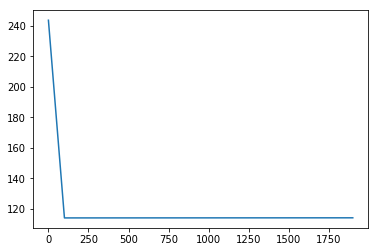

[ 1.45840637 -0.12176599]
3.175586223602295


In [17]:
import time
s_t = time.time()
m = gd(X_train, Y_train, 0.000004, 2000)
print(m)
e_t = time.time()
print(e_t-s_t)

In [18]:
Y_pred = predict(X_train, m)
np.savetxt("boston_dataset_pred.csv", Y_pred, '%.5f')
print(score(Y_train, predict(X_train, m)))


0.5846134544854487
